# Surface Waves and Dispersion

#### Exercise: 

* Find a large earthquake M>7 in an event list and extract the origin time
* Plot the seismograms and check whether you see surface waves
* Be careful: very deep earthquakes may not generate strong surface waves (find one and compare with a shallow one)
* Adapt the bandpass filter to see the "arrival time" of surface waves change with frequency, how far down in frequency can you go? Why does the seismogram look so different when you go to high frequencies?
* You may modify the code to define  a bandpass as fcentral +/- df  (where df is a frequency perturbation)
* Find the required info on the damaging Dec 30, 2020 Croatia earthquake, get the data and look for surface waves


We download data from the International Federation of Digital Seismograph Networks (FDSN)  https://www.fdsn.org


 <p style="width:40%;float:center;padding-left:50px">
<img src=https://www.fdsn.org/static/img/layout/fdsn-logo.png>
<span style="font-size:smaller">
</span>
</p>

Check out this www page to find other stations or networks, here we look at observations in Fürstenfeldbruck

http://www.fdsn.org/networks/

We use the client server BGR (Hannover)

Search interesting events here:

https://www.usgs.gov/natural-hazards/earthquake-hazards/earthquakes

or

https://www.emsc-csem.org

In [73]:
# Imports
from obspy import UTCDateTime
from obspy.clients.fdsn import Client



1 Trace(s) in Stream:
GR.FUR..BHZ | 2017-07-17T23:34:15.989999Z - 2017-07-18T00:57:35.989999Z | 20.0 Hz, 100001 samples


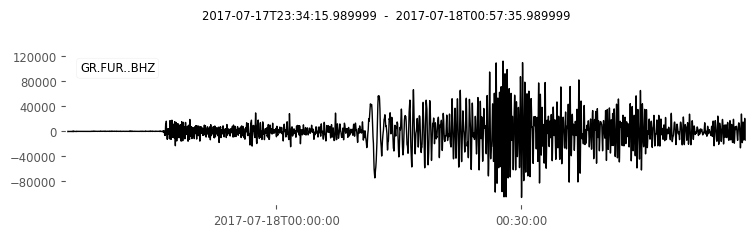

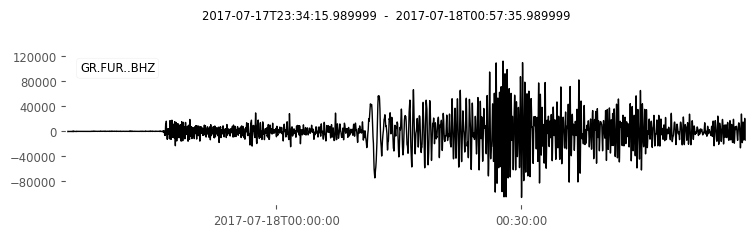

In [75]:
# Choose archive
client = Client("BGR")     # Data archive at Bundesanstalt für Geowissenschaften und Rohstoffe Hannover

# Provide origin time and time window of an earthquake of your choice

# Example: 	Mw 7.7, Region	KOMANDORSKIYE OSTROVA REGION, Date time	2017-07-17 23:34:16.4 UTC
t = UTCDateTime("2017-07-17T23:34:16")  

# Get vertical component observation of station FUR (Fürstenfeldbruck)
st = client.get_waveforms("GR", "FUR", "*", "BHZ",
                          t , t + 5000)

# Filter data
flow = 0.002 # Hz low frequency limit
fup  = 1. # Hz high frequency limit
st.filter("bandpass",freqmin=flow,freqmax=fup, corners=4, zerophase=True)

# Display information on data
print(st)

# Plot seismograms
st.plot()


